CHAPTER 1 - INTRODUCTION
On this chapter Joel describe very quickly the initial uses of data analysis with an "real" example.
I advise you to not start executing exercises of this chapter 1 until you have arrived on chapter 4. If you know Pyton programming, there is not a huge problem if you run the examples, but until chapter 3, Joel give us some basics that will help to understand the examples; It was helpful, because he presented his manner of writting code that helped to understand many steps.

In [1]:
'''
Instead of "typing" the dictionary, I've created the "users" from a list of tuples (After reading the chapter 3 it will be possible to create this dictionary from a common list of names!)
'''
users_list = [(0,'Hero'),(1,'Dunn'),(2,'Sue'),(3,'Chi'),(4,'Thor'),(5,'Clive'),(6,'Hicks'),(7,'Devin'),(8,'Kate'),(9,'Klein')] #list of tuples with the 'users id' and 'usernames'
users = [{'id':id_value,'name':username} for id_value,username in users_list] #list comprehension to create the dictionary 'users'
print(users)

[{'id': 0, 'name': 'Hero'}, {'id': 1, 'name': 'Dunn'}, {'id': 2, 'name': 'Sue'}, {'id': 3, 'name': 'Chi'}, {'id': 4, 'name': 'Thor'}, {'id': 5, 'name': 'Clive'}, {'id': 6, 'name': 'Hicks'}, {'id': 7, 'name': 'Devin'}, {'id': 8, 'name': 'Kate'}, {'id': 9, 'name': 'Klein'}]


In [2]:
friendship_pairs = [(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]

In [3]:
friendships = {user['id']:[] for user in users} #creating a dict with an empty list to each user (the friends will be appended in the lists for each user)
print(friendships)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}


In [4]:
for i,j in friendship_pairs: #iterating on each tuple
    friendships[i].append(j)
    friendships[j].append(i)
#if 'user 0' is friend of 'user 1', the inverse is true!

print(friendships)

{0: [1, 2], 1: [0, 2, 3], 2: [0, 1, 3], 3: [1, 2, 4], 4: [3, 5], 5: [4, 6, 7], 6: [5, 8], 7: [5, 8], 8: [6, 7, 9], 9: [8]}


What's the average connections number?

In [5]:
def number_of_friends(user):
    '''How many friend does the user have?'''
    #print(user)
    user_id = user['id']
    friend_ids = friendships[user_id]
    #print('user_id',user_id,'friend_ids',friend_ids)
    return len(friend_ids)
    
total_connections = sum(number_of_friends(user) for user in users)
print(total_connections)

24


In [6]:
#other way to calculate the total_connections
def number_of_friendships(user):
    friends_ids = friendships[user]
    return len(friends_ids)

total_connections = sum(number_of_friendships(user) for user in friendships)
print(total_connections)

24


In [7]:
num_users = len(users)
avg_connections = total_connections / num_users
print(avg_connections)

2.4


In [8]:
#other way to calculate the avg_connections
avg_connections = total_connections / len(friendships)
print(avg_connections)

2.4


Finding people with greater number of friends (more connected).

In [9]:
num_of_friends_by_id = [(user['id'],number_of_friends(user)) for user in users]
print(num_of_friends_by_id)

[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]


In [10]:
num_of_friends_by_id = [(user,number_of_friendships(user)) for user in friendships]
print(num_of_friends_by_id)

[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]


In [11]:
num_of_friends_by_id.sort(key=lambda id_and_friends: id_and_friends[1], reverse=True)
print(num_of_friends_by_id)

[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


Discovering the friends of friends (Data Scients maybe you would know)

In [12]:
#the lines below are the basic way to find the friends of friends - try it!
for user in friendships:
    #print(user)
    foaf_dict = {user:[]}
    for friend_id in friendships[user]:
        #print(friend_id)
        for foaf_id in friendships[friend_id]:
             #print(user,foaf_id)
             foaf_dict[user].append(foaf_id)
    print(foaf_dict)

#below, the list comprehension for the the code above
def foaf_ids_bad(user):
    return [foaf_id for friend_id in friendships[user['id']] for foaf_id in friendships[friend_id]]

{0: [0, 2, 3, 0, 1, 3]}
{1: [1, 2, 0, 1, 3, 1, 2, 4]}
{2: [1, 2, 0, 2, 3, 1, 2, 4]}
{3: [0, 2, 3, 0, 1, 3, 3, 5]}
{4: [1, 2, 4, 4, 6, 7]}
{5: [3, 5, 5, 8, 5, 8]}
{6: [4, 6, 7, 6, 7, 9]}
{7: [4, 6, 7, 6, 7, 9]}
{8: [5, 8, 5, 8, 8]}
{9: [6, 7, 9]}


Counting friends in common (shared friends)

In [13]:
from collections import Counter

def friends_of_friends(user):
    user_id = user['id']
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]
        for foaf_id in friendships[friend_id]
        if foaf_id != user_id
        and foaf_id not in friendships[user_id]
    )
print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


In [14]:
interests = [
    (0,'Hadoop'), (0,'Big Data'), (0,'HBase'), (0, 'Java'),
    (0,'Spark'), (0,'Storm'), (0,'Cassandra'),
    (1,'NoSQL'), (1,'MongoDB'), (1,'Cassandra'), (1,'HBase'),
    (1,'Postgres'), (2,'Python'), (2,'scikit-learn'), (2,'scipy'),
    (2,'numpy'), (2,'statsmodel'), (2,'pandas'), (3,'R'), (3,'Python'),
    (3,'statistics'), (3,'regression'), (3,'probability'),
    (4,'machine learning'), (4,'regression'), (4,'decision trees'),
    (4,'libsvm'), (5,'Python'), (5,'R'), (5,'Java'), (5,'C++'),
    (5,'Haskell'), (5,'programming languages'), (6,'statistics'),
    (6,'probability'), (6,'mathematics'), (6,'theory'),
    (7,'machine learning'), (7,'scikit-learn'), (7,'Mahout'),
    (7,'neural networks'), (8,'neural networks'), (8,'deep learning'),
    (8,'Big Data'), (8,'artificial inteligence'), (9,'Hadoop'),
    (9,'Java'), (9,'MapReduce'), (9,'Big Data')
]

Users with same interests

In [15]:
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

In [16]:
from collections import defaultdict

user_ids_by_interest = defaultdict(list)
print(user_ids_by_interest)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
print(user_ids_by_interest)

defaultdict(<class 'list'>, {})
defaultdict(<class 'list'>, {'Hadoop': [0, 9], 'Big Data': [0, 8, 9], 'HBase': [0, 1], 'Java': [0, 5, 9], 'Spark': [0], 'Storm': [0], 'Cassandra': [0, 1], 'NoSQL': [1], 'MongoDB': [1], 'Postgres': [1], 'Python': [2, 3, 5], 'scikit-learn': [2, 7], 'scipy': [2], 'numpy': [2], 'statsmodel': [2], 'pandas': [2], 'R': [3, 5], 'statistics': [3, 6], 'regression': [3, 4], 'probability': [3, 6], 'machine learning': [4, 7], 'decision trees': [4], 'libsvm': [4], 'C++': [5], 'Haskell': [5], 'programming languages': [5], 'mathematics': [6], 'theory': [6], 'Mahout': [7], 'neural networks': [7, 8], 'deep learning': [8], 'artificial inteligence': [8], 'MapReduce': [9]})


In [17]:
interests_by_user_id = defaultdict(list)
print(interests_by_user_id)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)
print(interests_by_user_id)

defaultdict(<class 'list'>, {})
defaultdict(<class 'list'>, {0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'], 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'], 2: ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodel', 'pandas'], 3: ['R', 'Python', 'statistics', 'regression', 'probability'], 4: ['machine learning', 'regression', 'decision trees', 'libsvm'], 5: ['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages'], 6: ['statistics', 'probability', 'mathematics', 'theory'], 7: ['machine learning', 'scikit-learn', 'Mahout', 'neural networks'], 8: ['neural networks', 'deep learning', 'Big Data', 'artificial inteligence'], 9: ['Hadoop', 'Java', 'MapReduce', 'Big Data']})


Most common interests

In [18]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user['id']]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user['id']
    )

print(most_common_interests_with(users[3]))

Counter({5: 2, 6: 2, 2: 1, 4: 1})


Profits and experience

In [19]:
salaries_and_ternure = [(83000,8.7), (88000,8.1),
                        (48000,0.7), (76000,6),
                        (69000,6.5), (76000,7.5),
                        (60000,2.5), (83000,10),
                        (48000,1.9), (63000,4.2)]

profits =  [83000, 88000, 48000, 76000, 69000, 76000, 60000, 83000, 48000, 63000]
experience =  [8.7, 8.1, 0.7, 6, 6.5, 7.5, 2.5, 10, 1.9, 4.2]


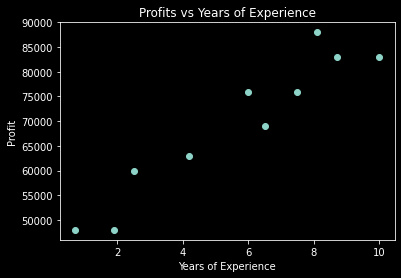

In [20]:
#I created this part of the code because it was not available on the chapter 1. This part was used to  plot the graph on figure 1-3
from matplotlib import pyplot as plt

#find a list of profits and a list of experience from the 'salaries_and_ternure'. This code is similar to that for 'friendships'
profits = []
experience = []

for i,j in salaries_and_ternure:
    profits.append(i)
    experience.append(j)
print('profits = ',profits)
print('experience = ',experience)

#this code below is similar to that one for figure 3-7 (chapter 3)
plt.scatter(experience,profits)

#add title
plt.title('Profits vs Years of Experience')

#add legend to the 'x' axis
plt.ylabel('Profit')
plt.xlabel('Years of Experience')

plt.show()

Profits averages by years of experience

In [22]:
salary_by_ternure = defaultdict(list)
print(salary_by_ternure)

defaultdict(<class 'list'>, {})


In [25]:
for salary, ternure in salaries_and_ternure:
    salary_by_ternure[ternure].append(salary)
print(salary_by_ternure)

defaultdict(<class 'list'>, {8.7: [83000, 83000], 8.1: [88000, 88000], 0.7: [48000, 48000], 6: [76000, 76000], 6.5: [69000, 69000], 7.5: [76000, 76000], 2.5: [60000, 60000], 10: [83000, 83000], 1.9: [48000, 48000], 4.2: [63000, 63000]})


In [27]:
average_salary_by_ternure = {
    ternure: sum(salaries) / len(salaries) for ternure, salaries in salary_by_ternure.items()
}
print(average_salary_by_ternure)

{8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}


Creating buckets based on experience

In [28]:
def ternure_bucket(ternure):
    if ternure < 2:
        return 'less than two'
    elif ternure < 5:
        return 'between two and five'
    else:
        return 'more than five'

#grouping the salaries in buckets
salary_by_ternure_bucket = defaultdict(list)

for salary, ternure in salaries_and_ternure:
    bucket = ternure_bucket(ternure)
    salary_by_ternure_bucket[bucket].append(salary)
print(salary_by_ternure_bucket)

average_salary_by_bucket = {
    ternure_bucket: sum(salaries) / len(salaries)
    for ternure_bucket, salaries in salary_by_ternure_bucket.items()
}
print(average_salary_by_bucket)


defaultdict(<class 'list'>, {'more than five': [83000, 88000, 76000, 69000, 76000, 83000], 'less than two': [48000, 48000], 'between two and five': [60000, 63000]})
{'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}


Topics of interests

In [37]:
words_and_counts = Counter(word for user, interest in interests
                            for word in interest.lower().split())
print(words_and_counts)

for word, count in words_and_counts. most_common():
    if count > 1:
        print(word,count)

Counter({'big': 3, 'data': 3, 'java': 3, 'python': 3, 'learning': 3, 'hadoop': 2, 'hbase': 2, 'cassandra': 2, 'scikit-learn': 2, 'r': 2, 'statistics': 2, 'regression': 2, 'probability': 2, 'machine': 2, 'neural': 2, 'networks': 2, 'spark': 1, 'storm': 1, 'nosql': 1, 'mongodb': 1, 'postgres': 1, 'scipy': 1, 'numpy': 1, 'statsmodel': 1, 'pandas': 1, 'decision': 1, 'trees': 1, 'libsvm': 1, 'c++': 1, 'haskell': 1, 'programming': 1, 'languages': 1, 'mathematics': 1, 'theory': 1, 'mahout': 1, 'deep': 1, 'artificial': 1, 'inteligence': 1, 'mapreduce': 1})
big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
